In [2]:
% matplotlib inline 

from neurosynth.base.dataset import Dataset
from neurosynth.analysis import decode
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import neurosynth database:
pickled_dataset = '../topography/metaanalysis/neurosynth/dataset.pkl' #'gradient_data/neurosynth/dataset.pkl'
dataset = Dataset.load(pickled_dataset)

In [4]:
# Import topics:
features = pd.read_csv('gradient_data/neurosynth/v3-topics-50.txt', sep='\t', index_col=0)
topics_to_keep = [4, 6, 14, 18, #17, 
                  23, 25, 20, #21,#27,
                  29, 30, 31, 33, 35, 
                  36,  38,  45, 37,
                  48, 49]
labels = ['semantics', 'cued attention', 'working memory',  'autobiographical memory', #'reading',
          'inhibition', 'motor', 'visual perception', #'number',#'reward',
          'visual attention', 'multisensory perception', 'visuospatial','eye movements', 'action',
          'auditory perception',  'pain',  'emotion',  'language', 
          'control', 'social cognition']            
features = features.iloc[:, topics_to_keep]
features.columns = labels
dataset.add_features(features, append=False)

In [5]:
# include code to convert surface to volume...

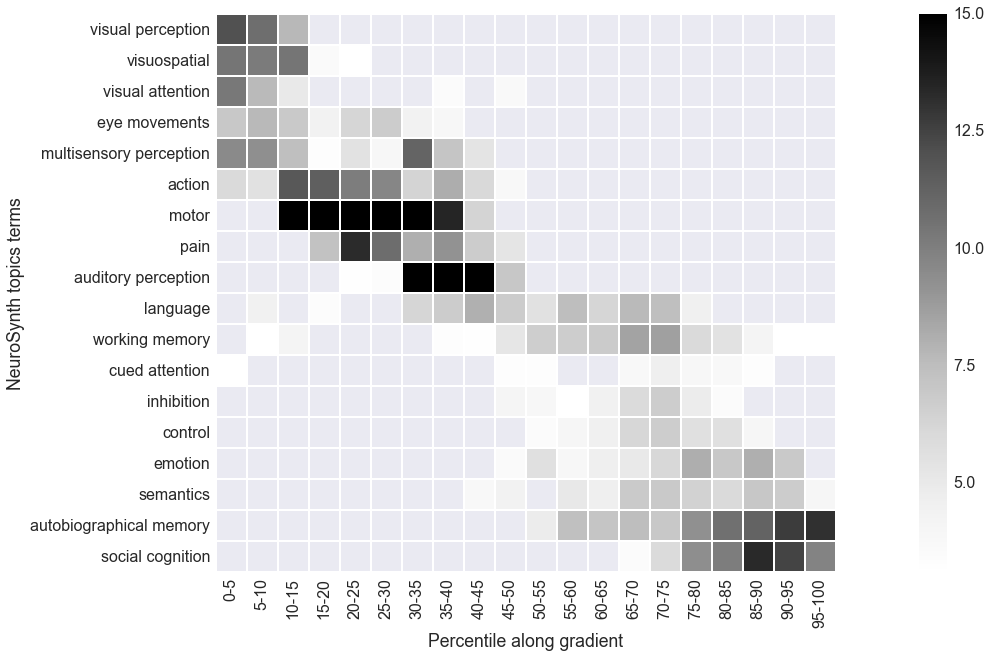

In [6]:
decoder = decode.Decoder(dataset, method='roi')

tot = 5
data = decoder.decode([str('gradient_data/masks/volume_%02d_%02d.nii.gz' % (i * tot, (i * tot) + tot)) for i in xrange(0,100/tot)])

df = []
df = data.copy()
newnames = []
[newnames.append(('%s-%s' % (str(i * tot), str((i*tot) + tot)))) for i in xrange(0,len(df.columns))]
df.columns = newnames

# Set threshold:
thr = 3.1
vmin = 0
vmax = 15

def getOrder(d, thr):
    dh = []
    for i in range(0,len(d)):
        di = d[i]
        dh.append(np.average(np.array(xrange(0,len(d[i]))) + 1, weights=di))
    heatmapOrder = np.argsort(dh)
    return heatmapOrder

df[df<thr] = 0 
heatmapOrder = getOrder(np.array(df), thr)

sns.set(context="paper", font="sans-serif", font_scale=2)
f, (ax1) = plt.subplots(nrows=1,ncols=1,figsize=(30, 10), sharey=True)
plotData = df.reindex(df.index[heatmapOrder])
cbar_kws = { 'ticks' : [ thr, vmax ] }

cax = sns.heatmap(plotData, linewidths=1, square=True, cmap='Greys', robust=False, 
            ax=ax1, vmin=thr, vmax=vmax, mask=plotData == 0)
sns.axlabel('Percentile along gradient', 'NeuroSynth topics terms')